# <span style="monospace; font-size: 30px;">_PROYECTO_</span> _Samsung Inovation Campus_.- <span style="background-color:#A7C7E7; color: #333333">**Recomendador de musica**</span>

    Desarrollado por:
        Esquivel Garcia Thania Paola
        Díaz Ruiz Israel
        Ignacio Cortés Atzin Maxela
<span style="monospace; font-size: 12px;">SIC 2024-25 | EQUIPO 9</span>

## Clasificación de Canciones por Sentimiento | Proyecto Parte 1 |

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import requests
import numpy as np
from scipy.stats import trim_mean
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix,mean_absolute_error
from sklearn.preprocessing import LabelEncoder



In [ ]:
df = pd.read_csv("amusica.csv")
df.tail()

,User_ID,User_Text,Sentiment_Label,Recommended_Song_ID,Song_Name,Artist,Genre,Tempo (BPM),Mood,Energy,Danceability
995,U996,Where carry sit argue through street.,Relaxed,S996,Clair de Lune,Debussy,Classical,60,Soothing,Low,Low
996,U997,Agreement state up hope free manage outside.,Happy,S997,Happy,Pharrell Williams,Pop,160,Joyful,High,High
997,U998,Particular else challenge ball.,Relaxed,S998,Clair de Lune,Debussy,Classical,60,Soothing,Low,Low
998,U999,Much level someone.,Relaxed,S999,Weightless,Marconi Union,Ambient,50,Calm,Low,Low
999,U1000,Appear the two score.,Relaxed,S1000,Weightless,Marconi Union,Ambient,50,Calm,Low,Low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User_ID              1000 non-null   object
 1   User_Text            1000 non-null   object
 2   Sentiment_Label      1000 non-null   object
 3   Recommended_Song_ID  1000 non-null   object
 4   Song_Name            1000 non-null   object
 5   Artist               1000 non-null   object
 6   Genre                1000 non-null   object
 7   Tempo (BPM)          1000 non-null   int64 
 8   Mood                 1000 non-null   object
 9   Energy               1000 non-null   object
 10  Danceability         1000 non-null   object
dtypes: int64(1), object(10)
memory usage: 86.1+ KB


In [ ]:
df.dtypes

User_ID                object
User_Text              object
Sentiment_Label        object
Recommended_Song_ID    object
Song_Name              object
Artist                 object
Genre                  object
Tempo (BPM)             int64
Mood                   object
Energy                 object
Danceability           object
dtype: object

In [ ]:
df.shape

(1000, 11)

In [ ]:
df.columns

Index(['User_ID', 'User_Text', 'Sentiment_Label', 'Recommended_Song_ID',
       'Song_Name', 'Artist', 'Genre', 'Tempo (BPM)', 'Mood', 'Energy',
       'Danceability'],
      dtype='object')

**¿Cual es el Tempo máximo y mínimo de las canciones **

In [ ]:
max_tempo= df["Tempo (BPM)"].max()
min_tempo= df["Tempo (BPM)"].min()
print(f"El máximo Tempo (BPM) es : {max_tempo}")
print(f"El mínimo Tempo (BPM) es :{min_tempo}")

El máximo Tempo (BPM) es : 160
El mínimo Tempo (BPM) es :50


Obtiene solo las canciones con energía "High" y luego cuenta cuántas hay en cada columna.

In [ ]:
filtro_Energy= df[df['Energy']== "High"]

filtro_Energy.count()

User_ID                518
User_Text              518
Sentiment_Label        518
Recommended_Song_ID    518
Song_Name              518
Artist                 518
Genre                  518
Tempo (BPM)            518
Mood                   518
Energy                 518
Danceability           518
dtype: int64

Obtiene solo las canciones con energía "Low" y luego cuenta cuántas hay en cada columna.

In [ ]:
filtro_Energy= df[df['Energy']== "Low"]

filtro_Energy.count()

User_ID                482
User_Text              482
Sentiment_Label        482
Recommended_Song_ID    482
Song_Name              482
Artist                 482
Genre                  482
Tempo (BPM)            482
Mood                   482
Energy                 482
Danceability           482
dtype: int64

¿cuántas canciones hay por estado de ánimo, diferenciando los tempos con colores?

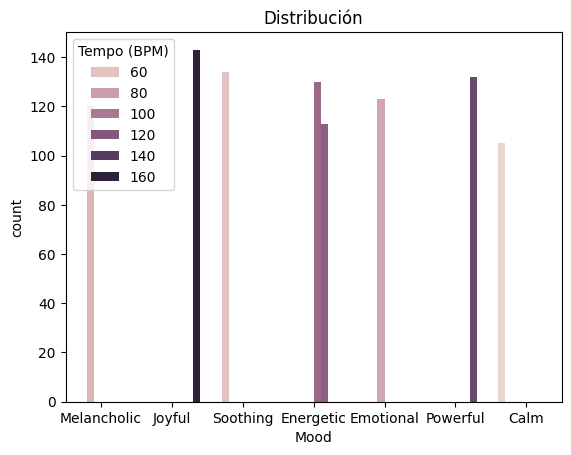

In [ ]:
sns.countplot(x='Mood', hue='Tempo (BPM)', data=df)
plt.title('Distribución')
plt.show()

🌟¿Existe alguna relación entre el tempo (BPM) y el estado de ánimo de la canción?


cantidad de canciones por sentimiento, diferenciando los valores de BPM con colores

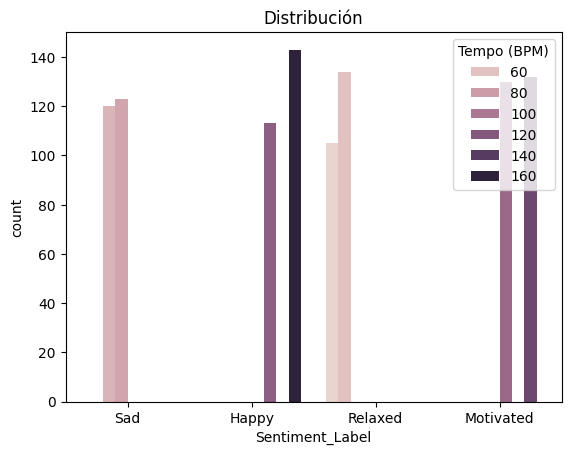

In [ ]:
sns.countplot(x='Sentiment_Label', hue='Tempo (BPM)', data=df)
plt.title('Distribución')
plt.show()

🌟¿Hay alguna canción que sea recomendada con más frecuencia para un sentimiento específico?

Artista más frecuente en cada categoría de sentimiento

In [ ]:
canciones_por_sentimiento = df.groupby("Sentiment_Label")["Artist"].value_counts().reset_index(name="Count")
canciones_top = canciones_por_sentimiento.groupby("Sentiment_Label").head(1)  # Canción más frecuente por sentimiento
print(canciones_top)

  Sentiment_Label             Artist  Count
0           Happy  Pharrell Williams    143
2       Motivated         Kanye West    132
4         Relaxed            Debussy    134
6             Sad           Coldplay    123


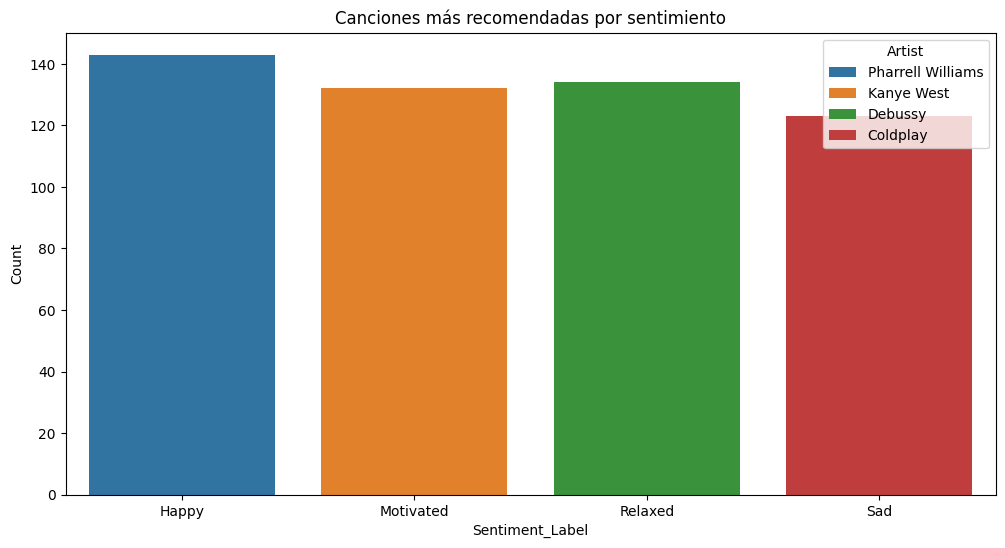

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=canciones_top, x="Sentiment_Label", y="Count", hue="Artist")
plt.title("Canciones más recomendadas por sentimiento")
plt.show()

🌟¿Hay alguna correlación entre el estado de ánimo del usuario y el género musical recomendado?

In [ ]:
# Ejemplo de código para el análisis:
from scipy.stats import chi2_contingency

# Crear tabla de contingencia
contingency_table = pd.crosstab(df["Mood"], df["Genre"])

# Realizar prueba de chi-cuadrado
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Valor p: {p_value:.4f}")

# Interpretación
if p_value < 0.05:
    print("Existe correlación significativa (p < 0.05).")
else:
    print("No hay evidencia suficiente para afirmar correlación (p ≥ 0.05).")

Valor p: 0.0000
Existe correlación significativa (p < 0.05).


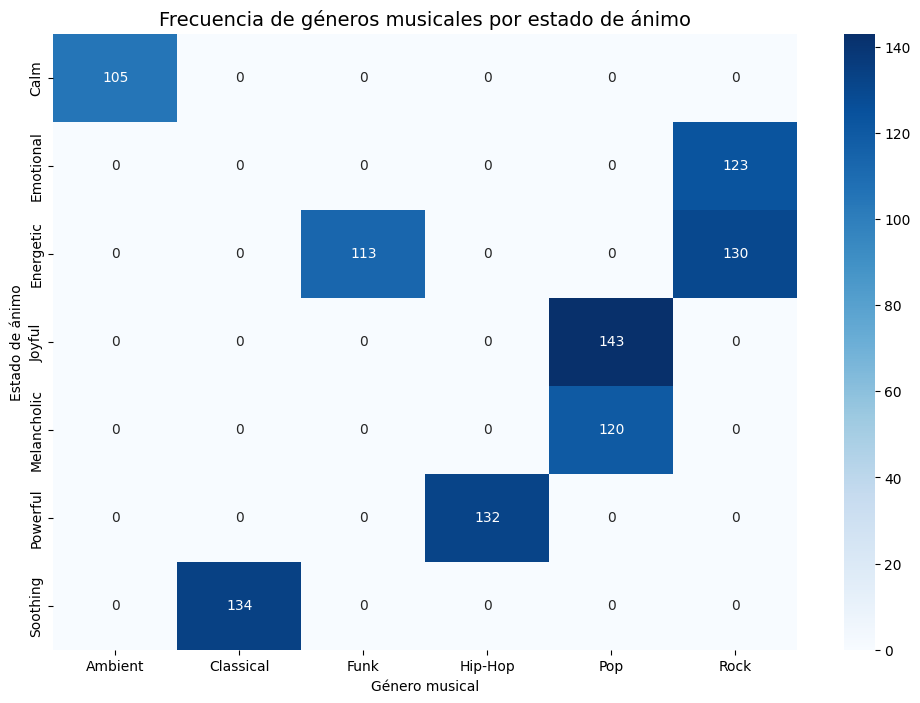

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues")
plt.title("Frecuencia de géneros musicales por estado de ánimo", fontsize=14)
plt.xlabel("Género musical")
plt.ylabel("Estado de ánimo")
plt.show()

🌟¿Qué género musical es más popular entre los usuarios con diferentes estados de ánimo?


In [ ]:
# Ejemplo de código para el análisis:
genre_by_mood = df.groupby("Mood")["Genre"].value_counts().reset_index(name="Count")
top_genres = genre_by_mood.groupby("Mood").head(1)

print("Género más popular por estado de ánimo:")
print(top_genres[["Mood", "Genre", "Count"]])

Género más popular por estado de ánimo:
          Mood      Genre  Count
0         Calm    Ambient    105
1    Emotional       Rock    123
2    Energetic       Rock    130
4       Joyful        Pop    143
5  Melancholic        Pop    120
6     Powerful    Hip-Hop    132
7     Soothing  Classical    134


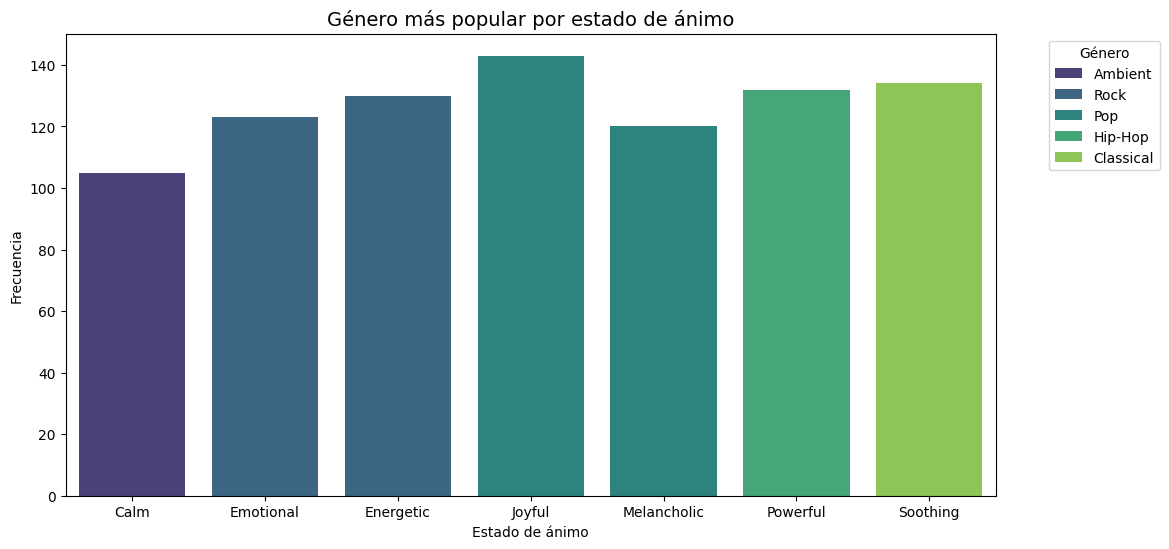

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_genres, x="Mood", y="Count", hue="Genre", palette="viridis")
plt.title("Género más popular por estado de ánimo", fontsize=14)
plt.xlabel("Estado de ánimo")
plt.ylabel("Frecuencia")
plt.legend(title="Género", bbox_to_anchor=(1.05, 1))
plt.show()

👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏

In [ ]:

# Seleccionar las características y la variable objetivo
features = ["Sentiment_Label", "Mood", "Energy", "Danceability"]
target = "Tempo (BPM)"


In [ ]:
# Convertir variables categóricas a numéricas
label_encoders = {}
df_encoded = df.copy()

for col in features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le



In [ ]:
# Separar datos en entrenamiento y prueba
X = df_encoded[features]
y = df_encoded[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
print()
print(f"El Error absoluto medio es :{mae}")
r2 = r2_score(y_test, y_pred)
print(f"El coeficiente de determinación es :{r2}")



El Error absoluto medio es :11.40520119982915
El coeficiente de determinación es :0.8490118829287274


**Sentiment_label vs Tempo(BPM)**

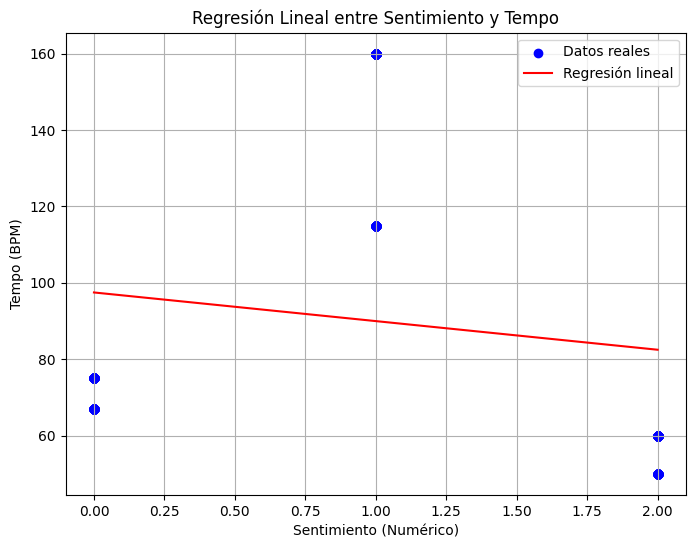

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Convertir las etiquetas de sentimiento a valores numéricos
sentiment_map = {'Sad': 0, 'Happy': 1, 'Relaxed': 2, 'Soothing': 3, 'Joyful': 4, 'Melancholic': 5}
df['Sentiment_Numeric'] = df['Sentiment_Label'].map(sentiment_map)

# Eliminar filas con valores faltantes en las columnas relevantes
df_cleaned = df.dropna(subset=['Sentiment_Numeric', 'Tempo (BPM)'])

# Definir las variables
X = df_cleaned[['Sentiment_Numeric']].values  # Variable independiente (Sentimiento numérico)
y = df_cleaned['Tempo (BPM)'].values          # Variable dependiente (Tempo en BPM)

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Realizar predicciones
y_pred = model.predict(X)

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, y_pred, color='red', label='Regresión lineal')
plt.title('Regresión Lineal entre Sentimiento y Tempo')
plt.xlabel('Sentimiento (Numérico)')
plt.ylabel('Tempo (BPM)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Verificar si hay valores faltantes y eliminar las filas correspondientes
df_cleaned = df.dropna(subset=['Sentiment_Numeric', 'Tempo (BPM)'])

# Definir las variables nuevamente
X_cleaned = df_cleaned[['Sentiment_Numeric']].values
y_cleaned = df_cleaned['Tempo (BPM)'].values

# Ajustar el modelo de regresión lineal
model.fit(X_cleaned, y_cleaned)

# Realizar las predicciones
y_pred_cleaned = model.predict(X_cleaned)

# Calcular el MSE y el R2
mse = mean_squared_error(y_cleaned, y_pred_cleaned)
r2 = r2_score(y_cleaned, y_pred_cleaned)

mse, r2


(1522.9904579542, 0.02355432265358437)

el r2 (coeficiente de determinación): indica que solo el **2.36%** de la variabilidad en el tempo de las canciones puede ser explicada por el sentimiento numérico. Esto es muy bajo y sugiere que el sentimiento, tal como está representado en este modelo, no tiene una relación fuerte con el tempo de la música.
En el  MSE de **1522.99** sugiere que las predicciones del modelo no son muy precisas. El modelo tiene un error considerable al intentar predecir el tempo a partir del sentimiento.

In [ ]:
# Mostrar las primeras filas del dataframe con los valores numéricos convertidos
df_cleaned.head(1000)


,User_ID,User_Text,Sentiment_Label,Recommended_Song_ID,Song_Name,Artist,Genre,Tempo (BPM),Mood,Energy,Danceability,Sentiment_Numeric
0,U1,Way ball purpose public experience recently re...,Sad,S1,Someone Like You,Adele,Pop,67,Melancholic,Low,Low,0.0
1,U2,Save officer two myself a.,Happy,S2,Happy,Pharrell Williams,Pop,160,Joyful,High,High,1.0
2,U3,Decade ahead everyone environment themselves a...,Relaxed,S3,Clair de Lune,Debussy,Classical,60,Soothing,Low,Low,2.0
3,U4,Best change letter citizen try ask quality pro...,Happy,S4,Happy,Pharrell Williams,Pop,160,Joyful,High,High,1.0
4,U5,Worker player chance kind actually.,Happy,S5,Happy,Pharrell Williams,Pop,160,Joyful,High,High,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,U996,Where carry sit argue through street.,Relaxed,S996,Clair de Lune,Debussy,Classical,60,Soothing,Low,Low,2.0
996,U997,Agreement state up hope free manage outside.,Happy,S997,Happy,Pharrell Williams,Pop,160,Joyful,High,High,1.0
997,U998,Particular else challenge ball.,Relaxed,S998,Clair de Lune,Debussy,Classical,60,Soothing,Low,Low,2.0
998,U999,Much level someone.,Relaxed,S999,Weightless,Marconi Union,Ambient,50,Calm,Low,Low,2.0


**Energy vs Tempo**

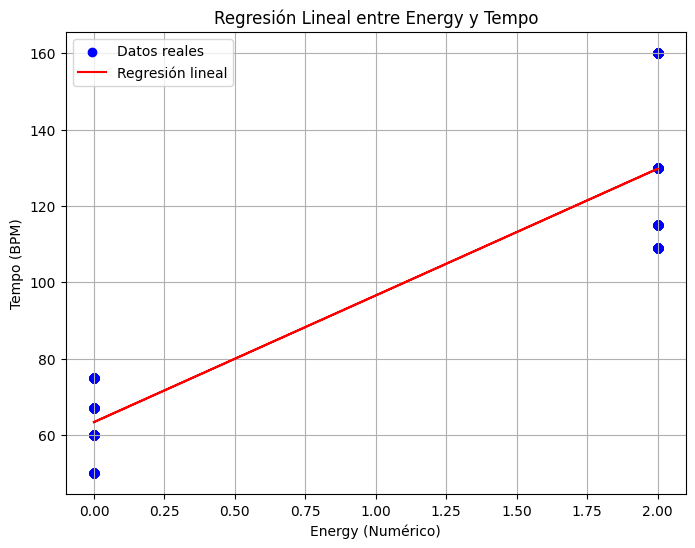

(249.9287066438104, 0.8147293441802856)

In [ ]:
# Convertir la columna 'Energy' a valores numéricos
energy_map = {'Low': 0, 'Medium': 1, 'High': 2}
df['Energy_Numeric'] = df['Energy'].map(energy_map)

# Eliminar filas con valores faltantes en las columnas relevantes
df_cleaned = df.dropna(subset=['Energy_Numeric', 'Tempo (BPM)'])

# Definir las variables para la regresión
X_energy = df_cleaned[['Energy_Numeric']].values  # Variable independiente (Energy numérica)
y_energy = df_cleaned['Tempo (BPM)'].values       # Variable dependiente (Tempo en BPM)

# Ajustar el modelo de regresión lineal
model.fit(X_energy, y_energy)

# Realizar las predicciones
y_pred_energy = model.predict(X_energy)

# Calcular el MSE y el R2
mse_energy = mean_squared_error(y_energy, y_pred_energy)
r2_energy = r2_score(y_energy, y_pred_energy)

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(X_energy, y_energy, color='blue', label='Datos reales')
plt.plot(X_energy, y_pred_energy, color='red', label='Regresión lineal')
plt.title('Regresión Lineal entre Energy y Tempo')
plt.xlabel('Energy (Numérico)')
plt.ylabel('Tempo (BPM)')
plt.legend()
plt.grid(True)
plt.show()

mse_energy, r2_energy


indica que **81.5%** de la variabilidad del tempo puede ser explicada por la variable Energy. Sugiere que la energía de la canción tiene una relación bastante fuerte con el tempo.

las canciones con mayor energía tienden a tener un tempo más rápido, los resultados indican que la energía de una canción tiene un impacto significativo en su tempo.

In [ ]:
df_cleaned.head(1000)

,User_ID,User_Text,Sentiment_Label,Recommended_Song_ID,Song_Name,Artist,Genre,Tempo (BPM),Mood,Energy,Danceability,Sentiment_Numeric,Energy_Numeric
0,U1,Way ball purpose public experience recently re...,Sad,S1,Someone Like You,Adele,Pop,67,Melancholic,Low,Low,0.0,0
1,U2,Save officer two myself a.,Happy,S2,Happy,Pharrell Williams,Pop,160,Joyful,High,High,1.0,2
2,U3,Decade ahead everyone environment themselves a...,Relaxed,S3,Clair de Lune,Debussy,Classical,60,Soothing,Low,Low,2.0,0
3,U4,Best change letter citizen try ask quality pro...,Happy,S4,Happy,Pharrell Williams,Pop,160,Joyful,High,High,1.0,2
4,U5,Worker player chance kind actually.,Happy,S5,Happy,Pharrell Williams,Pop,160,Joyful,High,High,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,U996,Where carry sit argue through street.,Relaxed,S996,Clair de Lune,Debussy,Classical,60,Soothing,Low,Low,2.0,0
996,U997,Agreement state up hope free manage outside.,Happy,S997,Happy,Pharrell Williams,Pop,160,Joyful,High,High,1.0,2
997,U998,Particular else challenge ball.,Relaxed,S998,Clair de Lune,Debussy,Classical,60,Soothing,Low,Low,2.0,0
998,U999,Much level someone.,Relaxed,S999,Weightless,Marconi Union,Ambient,50,Calm,Low,Low,2.0,0


**Danceability vs Tempo**

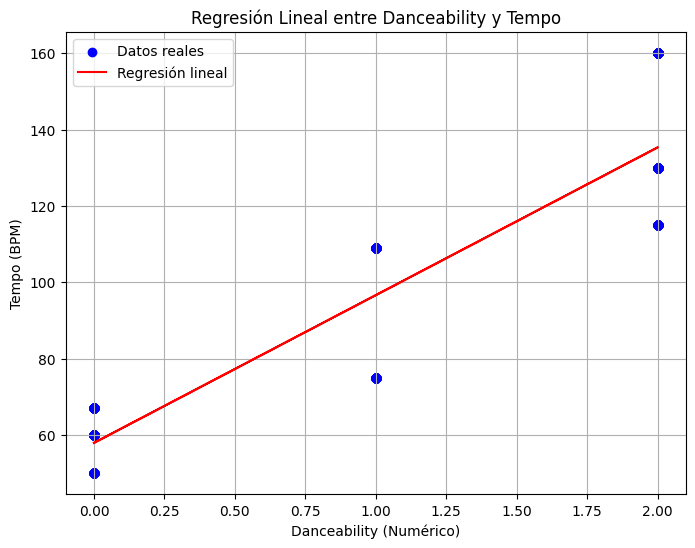

(231.97231393040894, 0.8280403107308767)

In [ ]:
# Convertir la columna 'Danceability' a valores numéricos
danceability_map = {'Low': 0, 'Medium': 1, 'High': 2}
df['Danceability_Numeric'] = df['Danceability'].map(danceability_map)

# Eliminar filas con valores faltantes en las columnas relevantes
df_cleaned = df.dropna(subset=['Danceability_Numeric', 'Tempo (BPM)'])

# Definir las variables para la regresión
X_danceability = df_cleaned[['Danceability_Numeric']].values  # Variable independiente (Danceability numérica)
y_danceability = df_cleaned['Tempo (BPM)'].values            # Variable dependiente (Tempo en BPM)

# Ajustar el modelo de regresión lineal
model.fit(X_danceability, y_danceability)

# Realizar las predicciones
y_pred_danceability = model.predict(X_danceability)

# Calcular el MSE y el R2
mse_danceability = mean_squared_error(y_danceability, y_pred_danceability)
r2_danceability = r2_score(y_danceability, y_pred_danceability)

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(X_danceability, y_danceability, color='blue', label='Datos reales')
plt.plot(X_danceability, y_pred_danceability, color='red', label='Regresión lineal')
plt.title('Regresión Lineal entre Danceability y Tempo')
plt.xlabel('Danceability (Numérico)')
plt.ylabel('Tempo (BPM)')
plt.legend()
plt.grid(True)
plt.show()

mse_danceability, r2_danceability


Sugiere que la capacidad de la canción para ser "bailable" tiene una relación significativa con su tempo.

In [ ]:
df_cleaned.head(1000)

,User_ID,User_Text,Sentiment_Label,Recommended_Song_ID,Song_Name,Artist,Genre,Tempo (BPM),Mood,Energy,Danceability,Sentiment_Numeric,Energy_Numeric,Danceability_Numeric
0,U1,Way ball purpose public experience recently re...,Sad,S1,Someone Like You,Adele,Pop,67,Melancholic,Low,Low,0.0,0,0
1,U2,Save officer two myself a.,Happy,S2,Happy,Pharrell Williams,Pop,160,Joyful,High,High,1.0,2,2
2,U3,Decade ahead everyone environment themselves a...,Relaxed,S3,Clair de Lune,Debussy,Classical,60,Soothing,Low,Low,2.0,0,0
3,U4,Best change letter citizen try ask quality pro...,Happy,S4,Happy,Pharrell Williams,Pop,160,Joyful,High,High,1.0,2,2
4,U5,Worker player chance kind actually.,Happy,S5,Happy,Pharrell Williams,Pop,160,Joyful,High,High,1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,U996,Where carry sit argue through street.,Relaxed,S996,Clair de Lune,Debussy,Classical,60,Soothing,Low,Low,2.0,0,0
996,U997,Agreement state up hope free manage outside.,Happy,S997,Happy,Pharrell Williams,Pop,160,Joyful,High,High,1.0,2,2
997,U998,Particular else challenge ball.,Relaxed,S998,Clair de Lune,Debussy,Classical,60,Soothing,Low,Low,2.0,0,0
998,U999,Much level someone.,Relaxed,S999,Weightless,Marconi Union,Ambient,50,Calm,Low,Low,2.0,0,0


**MOOD VS TEMPO**

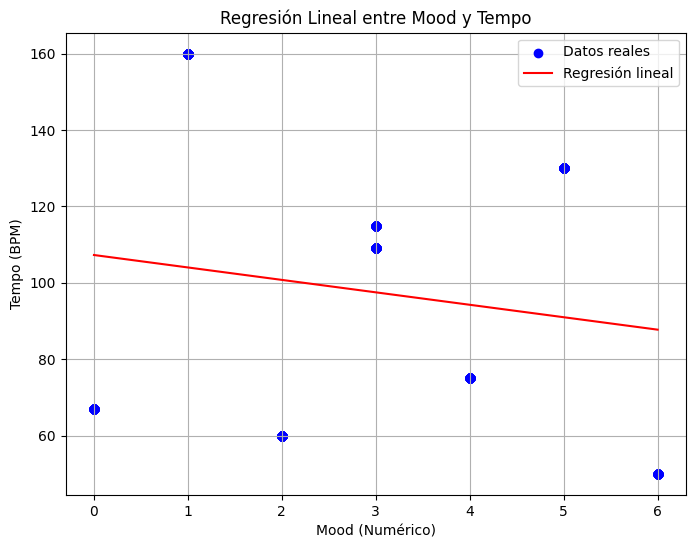

(1313.152100632836, 0.02656819961859258)

In [ ]:
# Convertir la columna 'Mood' a valores numéricos
mood_map = {
    'Melancholic': 0,
    'Joyful': 1,
    'Soothing': 2,
    'Energetic': 3,
    'Emotional': 4,
    'Powerful': 5,
    'Calm': 6
}
df['Mood_Numeric'] = df['Mood'].map(mood_map)

# Eliminar filas con valores faltantes en las columnas relevantes
df_cleaned = df.dropna(subset=['Mood_Numeric', 'Tempo (BPM)'])

# Definir las variables para la regresión
X_mood = df_cleaned[['Mood_Numeric']].values  # Variable independiente (Mood numérica)
y_mood = df_cleaned['Tempo (BPM)'].values    # Variable dependiente (Tempo en BPM)

# Ajustar el modelo de regresión lineal
model.fit(X_mood, y_mood)

# Realizar las predicciones
y_pred_mood = model.predict(X_mood)

# Calcular el MSE y el R2
mse_mood = mean_squared_error(y_mood, y_pred_mood)
r2_mood = r2_score(y_mood, y_pred_mood)

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(X_mood, y_mood, color='blue', label='Datos reales')
plt.plot(X_mood, y_pred_mood, color='red', label='Regresión lineal')
plt.title('Regresión Lineal entre Mood y Tempo')
plt.xlabel('Mood (Numérico)')
plt.ylabel('Tempo (BPM)')
plt.legend()
plt.grid(True)
plt.show()

mse_mood, r2_mood


indica que solo el **2.66%** de la variabilidad en el tempo es explicada por el Mood, tiene una relación muy débil con el tempo de la música.

In [ ]:
df_cleaned.head(1000)

,User_ID,User_Text,Sentiment_Label,Recommended_Song_ID,Song_Name,Artist,Genre,Tempo (BPM),Mood,Energy,Danceability,Sentiment_Numeric,Energy_Numeric,Danceability_Numeric,Mood_Numeric
0,U1,Way ball purpose public experience recently re...,Sad,S1,Someone Like You,Adele,Pop,67,Melancholic,Low,Low,0.0,0,0,0
1,U2,Save officer two myself a.,Happy,S2,Happy,Pharrell Williams,Pop,160,Joyful,High,High,1.0,2,2,1
2,U3,Decade ahead everyone environment themselves a...,Relaxed,S3,Clair de Lune,Debussy,Classical,60,Soothing,Low,Low,2.0,0,0,2
3,U4,Best change letter citizen try ask quality pro...,Happy,S4,Happy,Pharrell Williams,Pop,160,Joyful,High,High,1.0,2,2,1
4,U5,Worker player chance kind actually.,Happy,S5,Happy,Pharrell Williams,Pop,160,Joyful,High,High,1.0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,U996,Where carry sit argue through street.,Relaxed,S996,Clair de Lune,Debussy,Classical,60,Soothing,Low,Low,2.0,0,0,2
996,U997,Agreement state up hope free manage outside.,Happy,S997,Happy,Pharrell Williams,Pop,160,Joyful,High,High,1.0,2,2,1
997,U998,Particular else challenge ball.,Relaxed,S998,Clair de Lune,Debussy,Classical,60,Soothing,Low,Low,2.0,0,0,2
998,U999,Much level someone.,Relaxed,S999,Weightless,Marconi Union,Ambient,50,Calm,Low,Low,2.0,0,0,6


👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏👏

Sentiment_Label    0
Mood               0
Energy             0
Danceability       0
dtype: int64
0
MSE (Error Cuadrático Medio) en conjunto de prueba: 201.58
R² (Coeficiente de Determinación) en conjunto de prueba: 0.85
MSE Promedio en Validación Cruzada: 218.46


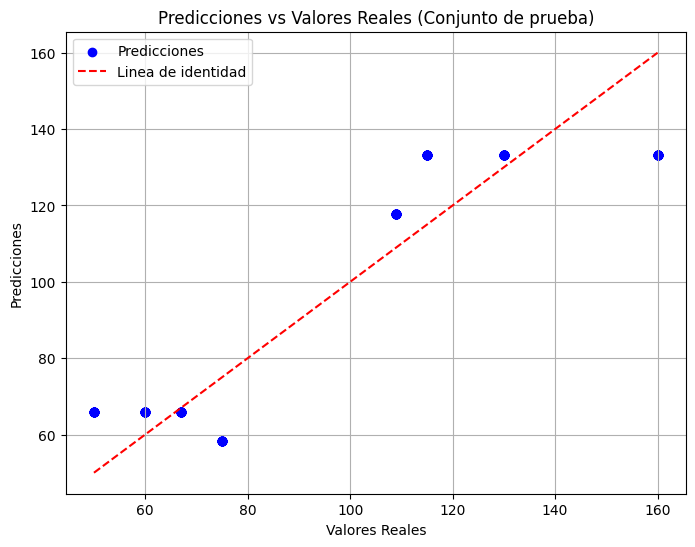

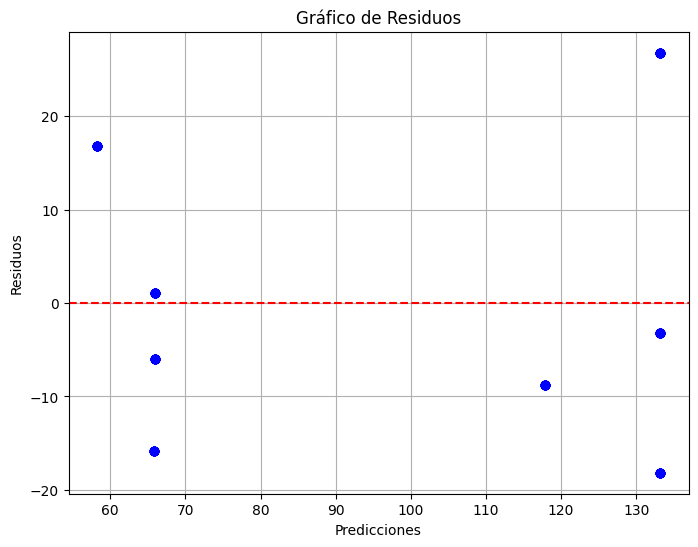

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Copia del dataframe para procesamiento
df_processed = df.copy()

# Convertir variables categóricas en numéricas
label_columns = ["Sentiment_Label", "Mood", "Energy", "Danceability"]
label_encoders = {}

for col in label_columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

# Definir la variable predictora (X) y la variable objetivo (y)
X = df_processed[["Sentiment_Label", "Mood", "Energy", "Danceability"]]
y = df_processed["Tempo (BPM)"]

# Verificar si hay valores nulos
print(X.isnull().sum())
print(y.isnull().sum())

# Crear un pipeline con escalado de características y regresión Lasso
model = Lasso(alpha=0.5)
pipeline = make_pipeline(StandardScaler(), model)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo con los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Realizar las predicciones con los datos de prueba
y_pred = pipeline.predict(X_test)

# Calcular el MSE y el R² para el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Mostrar los resultados de prueba
print(f"MSE (Error Cuadrático Medio) en conjunto de prueba: {mse_test:.2f}")
print(f"R² (Coeficiente de Determinación) en conjunto de prueba: {r2_test:.2f}")

# Validación cruzada para evaluar el rendimiento del modelo con diferentes subconjuntos de los datos
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')  # 5 pliegues

# Calcular el MSE promedio de la validación cruzada
mse_cv = -cv_scores.mean()  # Negar los valores de MSE, ya que cross_val_score devuelve valores negativos por la definición
print(f"MSE Promedio en Validación Cruzada: {mse_cv:.2f}")

# Graficar los resultados de las predicciones vs los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Linea de identidad')
plt.title('Predicciones vs Valores Reales (Conjunto de prueba)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la distribución de los residuos (diferencia entre valores reales y predicciones)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de Residuos')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()

no hay valores nulos en estas columnas.
El eje x muestra los valores reales de la variable objetivo "Tempo (BPM)".
El eje y muestra las predicciones generadas por el modelo.

Si los puntos están cerca de la línea roja: Esto indica que el modelo está haciendo buenas predicciones, ya que las predicciones son muy similares a los valores reales.

Si los puntos están lejos de la línea roja: Esto sugiere que el modelo está cometiendo errores significativos en esas predicciones.



Sentiment_Label    0
Mood               0
Energy             0
Danceability       0
dtype: int64
0
MSE (Error Cuadrático Medio) en conjunto de prueba: 199.72
R² (Coeficiente de Determinación) en conjunto de prueba: 0.85


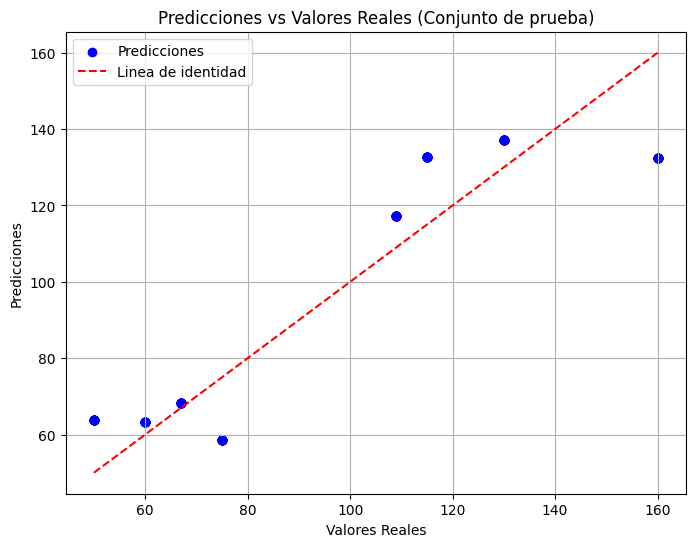

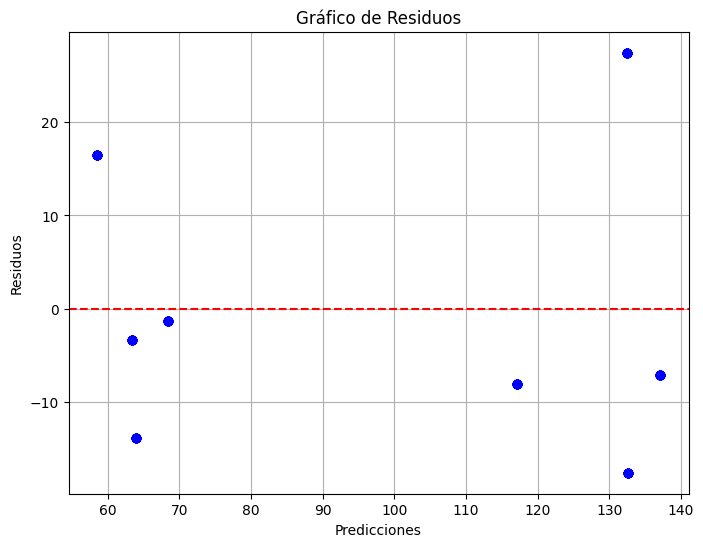

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Copiar el dataframe para procesamiento
df_processed = df.copy()

# Convertir variables categóricas en numéricas
label_columns = ["Sentiment_Label", "Mood", "Energy", "Danceability"]
label_encoders = {}

for col in label_columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

# Definir la variable predictora (X) y la variable objetivo (y)
X = df_processed[["Sentiment_Label", "Mood", "Energy", "Danceability"]]
y = df_processed["Tempo (BPM)"]

# Verificar si hay valores nulos
print(X.isnull().sum())  # Verificar en las características
print(y.isnull().sum())  # Verificar en la variable objetivo

# Eliminar filas con valores nulos si es necesario
X = X.dropna()
y = y[X.index]  # Asegurarse de que 'y' tenga el mismo índice después de eliminar los nulos

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar las predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Calcular el MSE y el R² para el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Mostrar los resultados de prueba
print(f"MSE (Error Cuadrático Medio) en conjunto de prueba: {mse_test:.2f}")
print(f"R² (Coeficiente de Determinación) en conjunto de prueba: {r2_test:.2f}")

# Graficar los resultados de las predicciones vs los valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Linea de identidad')
plt.title('Predicciones vs Valores Reales (Conjunto de prueba)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.legend()
plt.grid(True)
plt.show()

# Graficar la distribución de los residuos (diferencia entre valores reales y predicciones)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de Residuos')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()


Análisis detallado de las características numéricas de las columnas seleccionadas en un conjunto de datos.

Estimados de locación y variabilidad de la columna: Tempo (BPM)

Promedio: 97.76
Mediana: 109.00
Media truncada (10%): 95.95
Desviación estándar: 36.75
Rango: 110.00
Percentil 25: 67.00
Percentil 75: 130.00
Rango intercuartil: 63.00
--------------------------------------------------



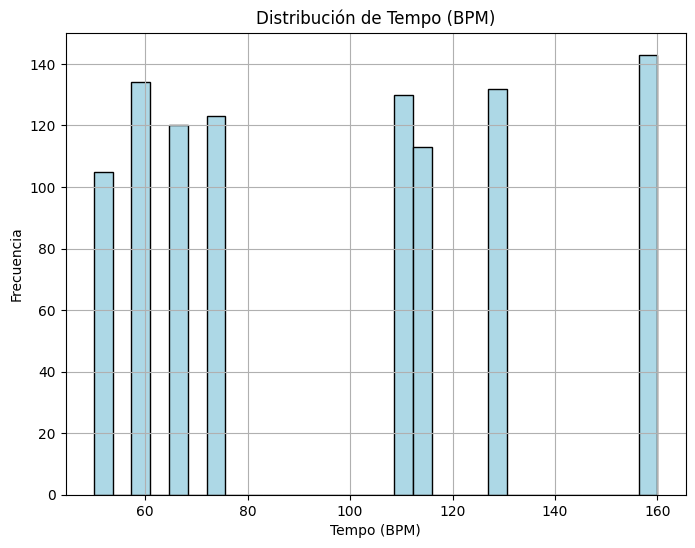

Estimados de locación y variabilidad de la columna: Energy

Promedio: 0.48
Mediana: 0.00
Media truncada (10%): 0.48
Desviación estándar: 0.50
Rango: 1.00
Percentil 25: 0.00
Percentil 75: 1.00
Rango intercuartil: 1.00
--------------------------------------------------



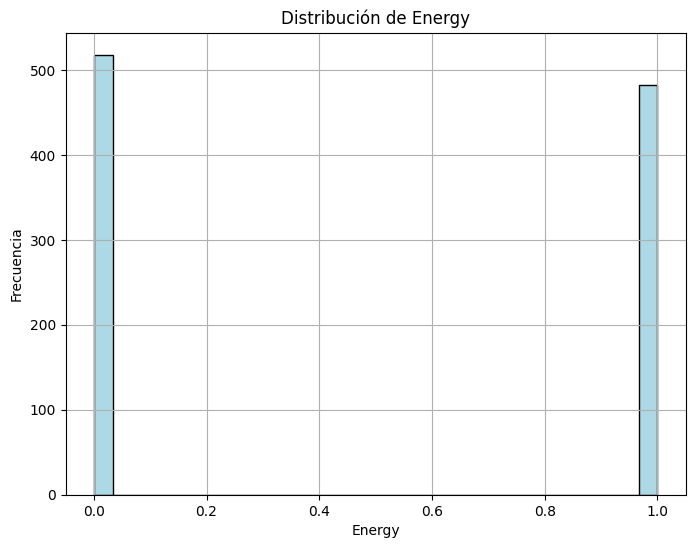

Estimados de locación y variabilidad de la columna: Danceability

Promedio: 0.86
Mediana: 1.00
Media truncada (10%): 0.83
Desviación estándar: 0.79
Rango: 2.00
Percentil 25: 0.00
Percentil 75: 2.00
Rango intercuartil: 2.00
--------------------------------------------------



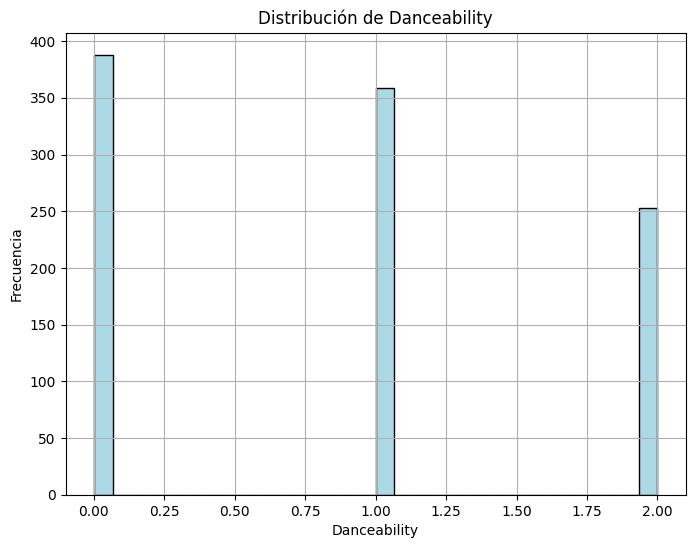

Estimados de locación y variabilidad de la columna: Mood

Promedio: 2.98
Mediana: 3.00
Media truncada (10%): 2.98
Desviación estándar: 1.88
Rango: 6.00
Percentil 25: 2.00
Percentil 75: 5.00
Rango intercuartil: 3.00
--------------------------------------------------



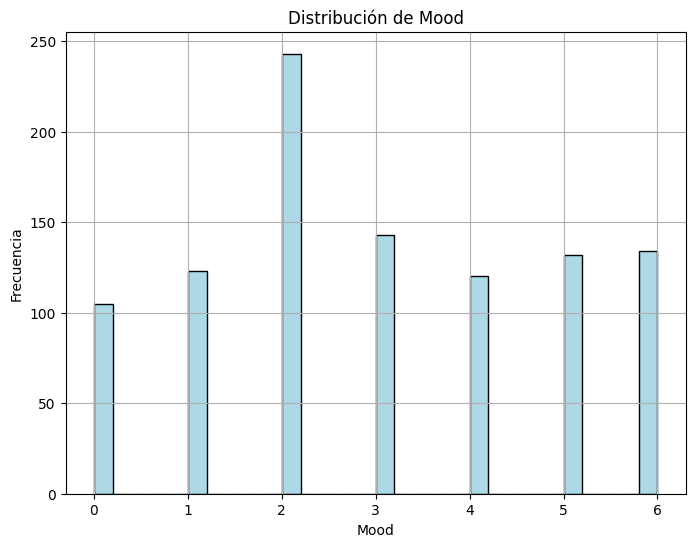

In [ ]:
from scipy.stats import trim_mean
import matplotlib.pyplot as plt

def estimados_columnas(columnas):
    for columna in columnas:
        print(f"Estimados de locación y variabilidad de la columna: {columna}\n")

        # Eliminar los valores nulos de la columna específica
        data = df_processed[columna].dropna()

        # Calcular las estadísticas
        promedio = data.mean()
        mediana = data.median()
        media_truncada = trim_mean(data, proportiontocut=0.1)  # Elimina 10% de valores extremos
        desviacion_std = data.std()
        rango = data.max() - data.min()
        percentil_25 = data.quantile(0.25)
        percentil_75 = data.quantile(0.75)
        rango_intercuartil = percentil_75 - percentil_25

        # Imprimir los resultados
        print(f"Promedio: {promedio:.2f}")
        print(f"Mediana: {mediana:.2f}")
        print(f"Media truncada (10%): {media_truncada:.2f}")
        print(f"Desviación estándar: {desviacion_std:.2f}")
        print(f"Rango: {rango:.2f}")
        print(f"Percentil 25: {percentil_25:.2f}")
        print(f"Percentil 75: {percentil_75:.2f}")
        print(f"Rango intercuartil: {rango_intercuartil:.2f}")
        print(f"--------------------------------------------------\n")

        # Opcional: Visualización de la distribución
        plt.figure(figsize=(8, 6))
        plt.hist(data, bins=30, color='lightblue', edgecolor='black')
        plt.title(f"Distribución de {columna}")
        plt.xlabel(columna)
        plt.ylabel('Frecuencia')
        plt.grid(True)
        plt.show()

# Llamar a la función con las columnas que te interesan
estimados_columnas(["Tempo (BPM)", "Energy", "Danceability","Mood"])


## Entrenamiento del Modelo de Clasificación | Proyecto Parte 2 |

In [ ]:
import numpy as np
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("C:/Users/isria/OneDrive/Documents/Curso de Samsung/Proyecto/music_sentiment_dataset.csv")
df.head()

,User_ID,User_Text,Sentiment_Label,Recommended_Song_ID,Song_Name,Artist,Genre,Tempo (BPM),Mood,Energy,Danceability
0,U1,Way ball purpose public experience recently re...,Sad,S1,Someone Like You,Adele,Pop,67,Melancholic,Low,Low
1,U2,Save officer two myself a.,Happy,S2,Happy,Pharrell Williams,Pop,160,Joyful,High,High
2,U3,Decade ahead everyone environment themselves a...,Relaxed,S3,Clair de Lune,Debussy,Classical,60,Soothing,Low,Low
3,U4,Best change letter citizen try ask quality pro...,Happy,S4,Happy,Pharrell Williams,Pop,160,Joyful,High,High
4,U5,Worker player chance kind actually.,Happy,S5,Happy,Pharrell Williams,Pop,160,Joyful,High,High


In [ ]:
df.shape

(1000, 11)

In [ ]:
corpus = df.loc[:, ["User_Text", "Sentiment_Label"]]

In [ ]:
corpus.head()

,User_Text,Sentiment_Label
0,Way ball purpose public experience recently re...,Sad
1,Save officer two myself a.,Happy
2,Decade ahead everyone environment themselves a...,Relaxed
3,Best change letter citizen try ask quality pro...,Happy
4,Worker player chance kind actually.,Happy


In [ ]:
#Convert to tuples
list1 = [tuple(x) for x in df[["User_Text", "Sentiment_Label"]].values]

Preprocessing

In [ ]:
import spacy

from tqdm import  tqdm



In [ ]:
nlp = spacy.load('en_core_web_sm') #Pipeline English

def normalize(text):
    for index, item in enumerate(tqdm(text)):
        tokens = nlp(item[0].lower())  # text in lowercase
        text_a = " ".join([word.lemma_ for word in tokens if (not word.is_punct)
                           and (len(word.text) > 2) and (not word.is_stop)])
        text[index] = (text_a, item[1])

    return text

#Normalization of text
X = normalize(list1)


100%|██████████| 1000/1000 [00:02<00:00, 410.96it/s]


Split in train and test

In [ ]:
from sklearn.model_selection import train_test_split

#Target label
Y = [y[1] for y in X]

#Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


Extract Features

In [ ]:
import nltk

def get_unique_words(text):
    #funtion that return the unique words in the sentences
    all_words = []
    for (text, sentiment) in text:
        all_words.extend(nltk.word_tokenize(text))
    return list(set(all_words))

def extract_features(document):
    # Funtions:
    # 1. take all documents in the corpus
    # 2. take all words in the document
    # 3. Write (false/true) if it shows every corpus' word in the sentece
    document_words = set(document)
    features = {}
    for word in unique_words:
        features['Contains(%s)' % word] = (word in document_words)

    return features

#Create diccionary
unique_words = get_unique_words(X)

#Create the data structs for nltk
X_train_nltk = nltk.classify.apply_features(extract_features, X_train)
X_test_nltk = nltk.classify.apply_features(extract_features, X_test)



In [ ]:
len(X_train_nltk)


800

Create Model (Nayve-Bayes and Support vector Machine)

In [ ]:
from sklearn.svm import SVC

#Classifiers
print('Entrenando Naive-Bayes')
nb = nltk.classify.NaiveBayesClassifier.train(X_train_nltk)

print('Entrenando Support Vector Machine')
svm = nltk.classify.SklearnClassifier(SVC(kernel='linear')).train(X_train_nltk)

classifiers = {
    'Naive-Bayes': nb,
    'SVM' : svm
}

Entrenando Naive-Bayes
Entrenando Support Vector Machine


In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score

evaluacion = list()

for  name, model in classifiers.items():
    #Predictions
    y_predictions = [model.classify(text[0]) for text in X_test_nltk]

    model = {
        'Name': name,  # Asignar el nombre del clasificador
        'accuracy': accuracy_score(y_true=Y_test, y_pred=y_predictions),
        'precision': precision_score(y_true=Y_test, y_pred=y_predictions, average='weighted'),
        'recall': recall_score(y_true=Y_test, y_pred=y_predictions, average='weighted'),
        'f1': f1_score(y_true=Y_test, y_pred=y_predictions, average='weighted')
    }
    evaluacion.append(model)


table = pd.DataFrame.from_dict(evaluacion)
#table.set_index('name', inplace=True)
table






,Name,accuracy,precision,recall,f1
0,Naive-Bayes,0.21,0.0441,0.21,0.072893
1,SVM,0.21,0.0441,0.21,0.072893


## Evaluación y Optimización del Clasificador | Proyecto Parte 3 |

In [ ]:
import numpy as np
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

Dataset

In [ ]:
df = pd.read_csv("C:/Users/isria/OneDrive/Documents/Curso de Samsung/Proyecto/music_sentiment_dataset.csv")
df.head()

,User_ID,User_Text,Sentiment_Label,Recommended_Song_ID,Song_Name,Artist,Genre,Tempo (BPM),Mood,Energy,Danceability
0,U1,Way ball purpose public experience recently re...,Sad,S1,Someone Like You,Adele,Pop,67,Melancholic,Low,Low
1,U2,Save officer two myself a.,Happy,S2,Happy,Pharrell Williams,Pop,160,Joyful,High,High
2,U3,Decade ahead everyone environment themselves a...,Relaxed,S3,Clair de Lune,Debussy,Classical,60,Soothing,Low,Low
3,U4,Best change letter citizen try ask quality pro...,Happy,S4,Happy,Pharrell Williams,Pop,160,Joyful,High,High
4,U5,Worker player chance kind actually.,Happy,S5,Happy,Pharrell Williams,Pop,160,Joyful,High,High


In [ ]:
corpus = df.loc[:, ["User_Text", "Sentiment_Label"]]

In [ ]:
list1 = [tuple(x) for x in df[["User_Text", "Sentiment_Label"]].values]

In [ ]:
print(list1)

[('Way ball purpose public experience recently realize too.', 'Sad'), ('Save officer two myself a.', 'Happy'), ('Decade ahead everyone environment themselves action health.', 'Relaxed'), ('Best change letter citizen try ask quality process.', 'Happy'), ('Worker player chance kind actually.', 'Happy'), ('Produce prove hot personal ago.', 'Motivated'), ('Culture soldier night never song dream.', 'Sad'), ('Expect order very.', 'Sad'), ('Clearly though film address stock Mr specific.', 'Motivated'), ('Market school sense expert blue mention nor risk.', 'Sad'), ('Until drive realize.', 'Motivated'), ('Staff life identify.', 'Happy'), ('Present strong people add believe message sign.', 'Happy'), ('Left quality wish may lose forward right.', 'Sad'), ('Customer share score Republican marriage guy.', 'Relaxed'), ('Even hotel notice of condition.', 'Happy'), ('Receive these like television.', 'Relaxed'), ('Policy school address or.', 'Sad'), ('Particular draw easy most across drive machine.', 'R

Preprocessing


In [ ]:
import spacy

from tqdm import  tqdm


In [ ]:
nlp = spacy.load('en_core_web_sm') #Pipeline English

def normalize(text):
    for index, item in enumerate(tqdm(text)):
        tokens = nlp(item[0].lower())  # text in lowercase
        text_a = " ".join([word.lemma_ for word in tokens if (not word.is_punct)
                           and (len(word.text) > 2) and (not word.is_stop)])
        text[index] = (text_a, item[1])

    return text

#Normalization of text
X = normalize(list1)

100%|██████████| 1000/1000 [00:06<00:00, 146.52it/s]


Split train and test

In [ ]:
from sklearn.model_selection import train_test_split

#Target label
Y = [y[1] for y in X]

#Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Extract Features

In [ ]:


from tensorflow.keras.preprocessing.text import Tokenizer


X_train_texts = [item[0] for item in X_train]  # Extrae solo los textos (primer elemento de cada tupla)
X_test_texts = [test[0] for test in X_test]

#Number of variables in the features vector
num_words = 100
tokenizer = Tokenizer(num_words=num_words)

tokenizer.fit_on_texts(X_train_texts)


X_matrix_train = tokenizer.texts_to_matrix(X_train_texts, mode='count')
X_matrix_test = tokenizer.texts_to_matrix(X_test_texts, mode='count')


print('Dimensión de la matriz de entrenamiento: {dim}\n'.format(dim=X_matrix_train.shape))
print('Bolsa de palabras de los datos de entrenamiento:\n{bolsa}\n'.format(bolsa=tokenizer.word_counts))
print('Índice de las palabras en la Matriz:\n{index}\n'.format(index=tokenizer.word_index))
print('Matriz de entrenamiento:\n{matrix}\n'.format(matrix=X_matrix_train))


Dimensión de la matriz de entrenamiento: (800, 64)

Bolsa de palabras de los datos de entrenamiento:
OrderedDict({'serve': 3, 'ground': 5, 'fight': 4, 'finally': 5, 'relate': 3, 'service': 5, 'real': 12, 'activity': 6, 'despite': 3, 'author': 8, 'suddenly': 5, 'teach': 3, 'group': 2, 'easy': 4, 'company': 5, 'edge': 3, 'people': 6, 'interest': 6, 'mention': 4, 'find': 6, 'carry': 6, 'military': 5, 'respond': 4, 'safe': 6, 'strong': 5, 'education': 8, 'woman': 5, 'artist': 6, 'paint': 4, 'election': 7, 'community': 5, 'site': 9, 'pull': 6, 'clearly': 4, 'far': 7, 'start': 2, 'position': 3, 'play': 7, 'total': 6, 'writer': 6, 'loss': 4, 'wife': 2, 'similar': 8, 'run': 5, 'later': 6, 'sign': 4, 'executive': 4, 'somebody': 4, 'statement': 4, 'project': 7, 'add': 8, 'dream': 6, 'ready': 6, 'past': 6, 'specific': 5, 'fall': 5, 'congress': 5, 'return': 5, 'response': 6, 'rate': 4, 'drug': 7, 'sense': 8, 'present': 11, 'west': 3, 'individual': 3, 'financial': 7, 'interesting': 7, 'ball': 5, 't

Encoder Label

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y_train)
y_train = encoder.transform(Y_train)
y_test = encoder.transform(Y_test)
y_train

array([3, 1, 0, 1, 0, 0, 0, 3, 2, 2, 0, 2, 2, 1, 1, 1, 1, 1, 3, 2, 2, 1,
       0, 3, 2, 0, 3, 0, 2, 3, 1, 2, 1, 3, 2, 0, 0, 1, 3, 3, 3, 1, 3, 0,
       3, 3, 1, 2, 0, 3, 3, 2, 1, 0, 3, 1, 1, 1, 1, 1, 0, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 0, 0, 0, 1, 0, 3, 1, 0, 1, 1, 0, 0, 2, 2, 3,
       2, 0, 0, 0, 2, 1, 1, 3, 2, 0, 0, 1, 1, 2, 0, 2, 2, 3, 2, 2, 2, 3,
       0, 1, 3, 0, 1, 1, 1, 1, 2, 3, 1, 0, 1, 0, 2, 0, 2, 2, 3, 1, 3, 1,
       1, 1, 0, 0, 2, 1, 1, 3, 2, 3, 2, 0, 0, 0, 1, 2, 0, 2, 3, 1, 3, 3,
       0, 2, 1, 1, 1, 1, 0, 3, 0, 2, 3, 3, 0, 1, 1, 3, 1, 1, 0, 3, 3, 3,
       0, 1, 3, 3, 2, 3, 3, 0, 0, 0, 0, 2, 2, 1, 1, 3, 2, 1, 2, 3, 0, 0,
       2, 1, 3, 0, 2, 2, 1, 1, 1, 2, 3, 0, 2, 2, 0, 0, 1, 2, 0, 3, 3, 0,
       1, 1, 1, 1, 0, 0, 3, 3, 3, 3, 0, 2, 2, 2, 2, 1, 3, 1, 2, 0, 0, 0,
       3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 1, 3, 2, 2, 0, 3, 0, 2, 3, 0, 2, 3,
       1, 3, 3, 2, 3, 1, 3, 1, 0, 3, 3, 2, 1, 3, 1, 0, 1, 1, 0, 1, 3, 3,
       0, 1, 1, 0, 1, 1, 1, 0, 3, 0, 3, 2, 2, 0, 1,

making the network neuronal


In [ ]:
# Using the GPU
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import metrics

np.random.seed(2)
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=num_words))
model.add(Dropout(0.1))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\isria\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,411 (5.51 KB)

 Trainable params: 1,411 (5.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_matrix_train, y_train, batch_size=1, epochs=20, verbose=2, validation_split=0.1)

Epoch 1/20
720/720 - 5s - 6ms/step - accuracy: 0.2583 - loss: -3.8210e-01 - val_accuracy: 0.2750 - val_loss: -2.9567e+00
Epoch 2/20
720/720 - 2s - 3ms/step - accuracy: 0.2597 - loss: -6.3334e+00 - val_accuracy: 0.2750 - val_loss: -1.7697e+01
Epoch 3/20
720/720 - 2s - 3ms/step - accuracy: 0.2597 - loss: -2.3969e+01 - val_accuracy: 0.2750 - val_loss: -5.4459e+01
Epoch 4/20
720/720 - 2s - 3ms/step - accuracy: 0.2597 - loss: -5.8796e+01 - val_accuracy: 0.2750 - val_loss: -1.1897e+02
Epoch 5/20
720/720 - 2s - 2ms/step - accuracy: 0.2597 - loss: -1.1490e+02 - val_accuracy: 0.2750 - val_loss: -2.1621e+02
Epoch 6/20
720/720 - 2s - 2ms/step - accuracy: 0.2597 - loss: -1.9199e+02 - val_accuracy: 0.2750 - val_loss: -3.4432e+02
Epoch 7/20
720/720 - 2s - 3ms/step - accuracy: 0.2597 - loss: -3.1262e+02 - val_accuracy: 0.2750 - val_loss: -5.2410e+02
Epoch 8/20
720/720 - 2s - 3ms/step - accuracy: 0.2597 - loss: -4.4135e+02 - val_accuracy: 0.2750 - val_loss: -7.3835e+02
Epoch 9/20
720/720 - 2s - 2ms/st

In [ ]:
# Feature evaluations
scores = model.evaluate(X_matrix_test, y_test)
print("Porcentaje acierto: %s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2773 - loss: -6442.6050  
Porcentaje acierto: compile_metrics: 26.50%


## Segmentación de Canciones por Clustering | Proyecto Parte 4 |

### Librerias y su objetivo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Preprocesamiento y escalado

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

Clustering y métricas

In [ ]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
import hdbscan
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

### Cargar el dataset

In [ ]:
df = pd.read_csv("music_sentiment_dataset.csv")
print(df.head())

  User_ID                                          User_Text Sentiment_Label  \
0      U1  Way ball purpose public experience recently re...             Sad   
1      U2                         Save officer two myself a.           Happy   
2      U3  Decade ahead everyone environment themselves a...         Relaxed   
3      U4  Best change letter citizen try ask quality pro...           Happy   
4      U5                Worker player chance kind actually.           Happy   

  Recommended_Song_ID         Song_Name             Artist      Genre  \
0                  S1  Someone Like You              Adele        Pop   
1                  S2             Happy  Pharrell Williams        Pop   
2                  S3     Clair de Lune            Debussy  Classical   
3                  S4             Happy  Pharrell Williams        Pop   
4                  S5             Happy  Pharrell Williams        Pop   

   Tempo (BPM)         Mood Energy Danceability  
0           67  Melancholic   

### --- 1. Preprocesamiento de Datos ---

In [ ]:
text_col = "User_Text"
categorical_col = "Genre"
num_cols = ["Tempo (BPM)", "Energy", "Danceability"]

mapping = {"Low": 0, "High": 1, "Medium": 0.5}
df["Energy"] = df["Energy"].map(mapping)
df["Danceability"] = df["Danceability"].map(mapping)

Transformaciones:

In [ ]:
tfidf = TfidfVectorizer(max_features=500)
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
scaler = StandardScaler()

Aplicar transformaciones

In [ ]:
tfidf_matrix = tfidf.fit_transform(df[text_col])
print("TF-IDF shape:", tfidf_matrix.shape)

genre_encoded = ohe.fit_transform(df[[categorical_col]])
print("Genre encoded shape:", genre_encoded.shape)

num_scaled = scaler.fit_transform(df[num_cols])
print("Num cols scaled shape:", num_scaled.shape)

TF-IDF shape: (1000, 500)
Genre encoded shape: (1000, 6)
Num cols scaled shape: (1000, 3)


Convertimos las variables densas a una matriz dispersa...

In [ ]:
from scipy.sparse import hstack
from scipy import sparse
dense_features = sparse.csr_matrix(np.hstack([genre_encoded, num_scaled]))

# Concatenamos todas las características
X = hstack([tfidf_matrix, dense_features])
print("Total features shape:", X.shape)

# Convertimos X a una matriz densa para las métricas y clustering
X_dense = X.toarray()

Total features shape: (1000, 509)


### --- 2. Aplicación de Algoritmos de Clustering ---

In [ ]:
def evaluate_clustering(X, labels, algorithm_name):
    if len(np.unique(labels)) > 1:
        sil_score = silhouette_score(X, labels)
        db_index = davies_bouldin_score(X, labels)
        print(f"{algorithm_name} - Silhouette Score: {sil_score:.3f}, Davies-Bouldin Index: {db_index:.3f}")
    else:
        print(f"{algorithm_name} - Se detectó solo un cluster.")

Algoritmos:

In [ ]:
# K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
labels_kmeans = kmeans.fit_predict(X_dense)
evaluate_clustering(X_dense, labels_kmeans, "K-Means")

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_dense)
evaluate_clustering(X_dense, labels_dbscan, "DBSCAN")

# HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
labels_hdbscan = clusterer.fit_predict(X_dense)
evaluate_clustering(X_dense, labels_hdbscan, "HDBSCAN")

# Gaussian Mixture Models (GMM)
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_labels = gmm.fit_predict(X_dense)
evaluate_clustering(X_dense, gmm_labels, "GMM")

K-Means - Silhouette Score: 0.224, Davies-Bouldin Index: 2.532
DBSCAN - Se detectó solo un cluster.
HDBSCAN - Silhouette Score: 0.308, Davies-Bouldin Index: 1.275
GMM - Silhouette Score: 0.224, Davies-Bouldin Index: 2.532


### --- 3. Asignación de Sentimientos a Clusters ---

In [ ]:
sentiment_labels = ["Feliz", "Triste", "Enérgico", "Relajado", "Nostálgico"]
cluster_sentiment_mapping = {i: sentiment_labels[i] for i in range(len(sentiment_labels))}

df["Sentiment"] = [cluster_sentiment_mapping[label] if label in cluster_sentiment_mapping else "Desconocido" for label in labels_kmeans]

### --- 4. Visualización con t-SNE ---

C:\Users\josec\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


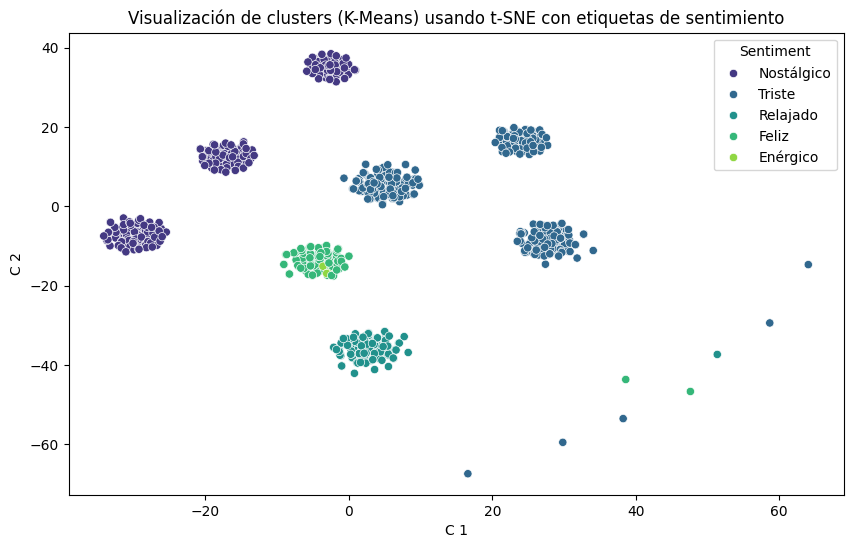

In [ ]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_dense)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df["Sentiment"], palette="viridis", legend="full")
plt.title("Visualización de clusters (K-Means) usando t-SNE con etiquetas de sentimiento")
plt.xlabel("C 1")
plt.ylabel("C 2")
plt.show()